### Load tensorflow

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
#Train the model
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Collect Data

In [3]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

### Convert Output label to multiple values

In [5]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [6]:
#trainX=trainX/255
#testX=testX/255    # standardize the data for train and test to be between 0-1

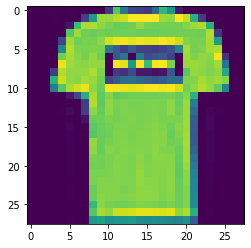

In [7]:
# Show one of the images from the training dataset
import matplotlib.pyplot as plt
plt.imshow(trainX[1])

In [8]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [9]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

### Add layers for Classification

In [10]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
#model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       7

## Train the model

In [14]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1296 - accuracy: 0.9538 - val_loss: 0.2684 - val_accuracy: 0.9169
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1067 - accuracy: 0.9615 - val_loss: 0.2929 - val_accuracy: 0.9095
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0904 - accuracy: 0.9675 - val_loss: 0.3112 - val_accuracy: 0.9177
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0750 - accuracy: 0.9728 - val_loss: 0.2955 - val_accuracy: 0.9143
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0590 - accuracy: 0.9790 - val_loss: 0.3312 - val_accuracy: 0.9176
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0521 - accuracy: 0.9811 - val_loss: 0.3577 - val_accuracy: 0.9136
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0448 - accuracy: 0.9842 - val_loss: 0.3615 - val_ac

In [ ]:
model.save('demo.h5')

In [ ]:
https://keras.io/api/callbacks/model_checkpoint/
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint